# *Jared Galloway*

*Introduction and TreeSequence Primer*

*Matsen Lab Meeting - May 15, 2020*

# *Elevator Introduction*

 
* $\approx 6$ years ago: Undergraduate in Computer and Information Science, University of Oregon.

 * $\approx 3$ years ago: Research w/ Peter Ralph at IE$^{2}$

 * Gap year to continue research with Peter and Andy Kern (@pastramimachine)... (@popgengoogling?)

* Started a Masters in Biology at the University of Oregon

* Now, here I am!

# *The fun stuff: TreeSequence Primer*

For a set of sampled chromosomes, at each position along the genome there is a genealogical tree that says how they are related. 

The tabular data structure known as a `TreeSequence`, created by Jerome Kelleher at Oxford Big Data Institute, allows us to effeciently store these related histories and query them with a powerful and  community maintined set of tools including
`tskit`, `mspime`, `SLiM`, `tsinfer`, and much more

![SegmentLocal](./materials/sim_ts.anim.gif "segment")

## *Let's back up a little ... Genomes and Genealogies*

### Genomes

* reflect The basic mechanisms of life!

* Are _very_ big, from $\approx 10^{7}$ to $10^{12}$ nucleotides long

* With Next Generation Sequencing, we are able to sequence _lots_ of samples.

* They are the result of the population process throughout history...

### Genealogies

* a single genealogy describes the history resulting in an individual's genome.

<img src="materials/family_tree.png" width="750" align="center">

[gcbias](https://gcbias.org/2013/11/11/how-does-your-number-of-genetic-ancestors-grow-back-over-time/)

<img src="materials/family_tree_w_trans.png" width="750" align="center">

[gcbias](https://gcbias.org/2013/11/11/how-does-your-number-of-genetic-ancestors-grow-back-over-time/)

* We are all related by an _expansive_ genealogical network

* We can only observe _genomes_ from recent history (with some exceptions), that have been derived from the stochastic processes of mutation and recombination throughout history. 

 * What can we learn about the structure, history, and biology of a _genome?_

## Modeling

* Without recombination, there would be a **single** coalescent tree describing this relationship across the genome for **all** samples.

* We can study the the genealogy of a single locus (w/ no recombination) using the Kingman coalescent model

<img src="materials/coalecent.png" width="750" align="center">



* Recombination splits the ancestry on either side of the chromosome at the point where it occurs.

* This means that a more complex model was needed if we wanted to study linkage between any loci passed down through generations, split by recombination.

* Soon after the single locus coalescent was derived, Hudson defined an algorithm to simulate the coalescent with recombination

* These models ended up resulting what's known as the *Ancestral Recombination Graph*

### The problem

* The ARG has a scaling problem with number of recombination events

* This is because essentially with each recombination event, ancestral trees split and all the information in the tree had to be copied over to a new tree.

* seems to imply that simulating the coalescent with large genomes and big samples is hopeless :(

* But wait!

[Jerome Kelleher, Alison Etheridge, & Gil McVean 2016](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4856371/)

msprime: whole genomes with $N \approx 10^{5}$ in O(minutes)
<img src="materials/msprime-time.png" width="1000" align="center">

## `TreeSequence` Tabular Data Structure

* Key idea, marginal trees along the genome are _highly_ correlated with neighboring trees.

* Storing a tree sequence in the four tables - nodes, edges, sites, and mutations - is succinct (no redundancy).

<img src="materials/example_tree_sequence.png" width="1100" align="center">

[Jerome Kelleher, Kevin R. Thornton, Jaime Ashander, Peter L. Ralph, 2018](https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1006581)

<img src="materials/tsinfer_sizes.png" width="1100" align="center">

[Jerome Kelleher, Yan Wong, Patrick K. Albers, Anthony W. Wohns, Gil McVean]()

## `msprime` and `tskit` python API

`msprime` is a coalescent simulator which produces `tskit.TreeSequence` objects 

In [2]:
import msprime
ts = msprime.simulate(5, recombination_rate=0)
print(ts.first().draw(format="unicode"))

  8      
┏━┻━━┓   
┃    7   
┃  ┏━┻━┓ 
┃  ┃   6 
┃  ┃  ┏┻┓
┃  5  ┃ ┃
┃ ┏┻┓ ┃ ┃
0 1 4 2 3



A `TreeSequence` Object contains a collection of `Tree` Objects

In [3]:
ts = msprime.simulate(5, recombination_rate=0)
print(type(ts))
print(type(ts.trees()))
marginal_tree_iter = ts.trees()
print(type(next(marginal_tree_iter)))
print(f"There is/are {ts.num_trees} marginal tree(s) in this tree sequence")
print(type( ))

<class 'tskit.trees.TreeSequence'>
<class 'tskit.trees.TreeIterator'>
<class 'tskit.trees.Tree'>
There is/are 1 marginal tree(s) in this tree sequence


StopIteration: 

In [5]:
ts = msprime.simulate(5, recombination_rate=1.0, mutation_rate = 0.4, random_seed=42)

print("Tree sequence has {} trees".format(ts.num_trees))
print()
for tree in ts.trees():
    print(
        "Tree {} covers [{:.2f}, {:.2f}); TMRCA = {:.4f}".format(
            tree.index, *tree.interval, tree.time(tree.root)
        )
    )

Tree sequence has 7 trees

Tree 0 covers [0.00, 0.08); TMRCA = 4.2542
Tree 1 covers [0.08, 0.27); TMRCA = 2.5973
Tree 2 covers [0.27, 0.37); TMRCA = 4.2542
Tree 3 covers [0.37, 0.66); TMRCA = 2.5973
Tree 4 covers [0.66, 0.71); TMRCA = 4.2542
Tree 5 covers [0.71, 0.75); TMRCA = 2.5973
Tree 6 covers [0.75, 1.00); TMRCA = 2.5973


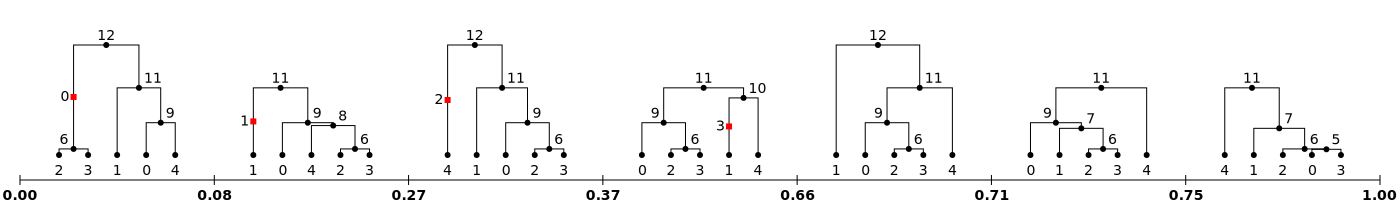

In [6]:
from IPython.display import SVG 
SVG(ts.draw_svg())

In [7]:
print(ts.genotype_matrix())

[[0 0 1 1 0]
 [0 1 0 0 0]
 [0 0 0 0 1]
 [0 1 0 0 0]]


In [8]:
print(f"Node Table:\n\n {ts.tables.nodes} \n####################\n")
print(f"Edge Table:\n\n {ts.tables.edges} \n####################\n\n")
print(f"Sites Table:\n\n {ts.tables.sites} \n####################\n\n")
print(f"Mutation Table:\n\n {ts.tables.mutations} \n####################\n\n")

Node Table:

 id	flags	population	individual	time	metadata
0	1	0	-1	0.00000000000000	
1	1	0	-1	0.00000000000000	
2	1	0	-1	0.00000000000000	
3	1	0	-1	0.00000000000000	
4	1	0	-1	0.00000000000000	
5	0	0	-1	0.22090207671051	
6	0	0	-1	0.23494643003628	
7	0	0	-1	1.03158573996900	
8	0	0	-1	1.13789156442405	
9	0	0	-1	1.24881171047552	
10	0	0	-1	2.20824188005252	
11	0	0	-1	2.59727629695212	
12	0	0	-1	4.25423996099234	 
####################

Edge Table:

 id	left		right		parent	child
0	0.75357156	1.00000000	5	0
1	0.75357156	1.00000000	5	3
2	0.00000000	1.00000000	6	2
3	0.00000000	0.75357156	6	3
4	0.75357156	1.00000000	6	5
5	0.71007405	1.00000000	7	1
6	0.71007405	1.00000000	7	6
7	0.07726539	0.26805689	8	4
8	0.07726539	0.26805689	8	6
9	0.00000000	0.75357156	9	0
10	0.00000000	0.07726539	9	4
11	0.26805689	0.71007405	9	6
12	0.71007405	0.75357156	9	7
13	0.07726539	0.26805689	9	8
14	0.37196769	0.66462851	10	1
15	0.37196769	0.66462851	10	4
16	0.00000000	0.37196769	11	1
17	0.66462851	1.00000000	11	4
18	0.

Lots more options for complex coalescent simulation!

In [9]:
help(msprime.simulate)

Help on function simulate in module msprime.simulations:

simulate(sample_size=None, Ne=1, length=None, recombination_rate=None, recombination_map=None, mutation_rate=None, population_configurations=None, migration_matrix=None, demographic_events=[], samples=None, model=None, record_migrations=False, random_seed=None, mutation_generator=None, num_replicates=None, from_ts=None, start_time=None, end_time=None, record_full_arg=False, num_labels=None)
    Simulates the coalescent with recombination under the specified model
    parameters and returns the resulting :class:`tskit.TreeSequence`. Note that
    Ne is the effective diploid population size (so the effective number
    of genomes in the population is 2*Ne), but ``sample_size`` is the
    number of (monoploid) genomes sampled.
    
    :param int sample_size: The number of sampled monoploid genomes.  If not
        specified or None, this defaults to the sum of the subpopulation sample
        sizes. Either ``sample_size``, ``popul

`TreeSequence` Objects are _immutable,_  to edit a tree sequence we must edit the underlying tables.

In [6]:
def strip_singletons(ts):
    tables = ts.dump_tables()
    tables.sites.clear()
    tables.mutations.clear()
    for tree in ts.trees():
        for site in tree.sites():
            assert len(site.mutations) == 1  # Only supports infinite sites muts.
            mut = site.mutations[0]
            if tree.num_samples(mut.node) > 1:
                site_id = tables.sites.add_row(
                    position=site.position, ancestral_state=site.ancestral_state
                )
                tables.mutations.add_row(
                    site=site_id, node=mut.node, derived_state=mut.derived_state
                )
    return tables.tree_sequence()

Using `tskit`, We can compute all sorts of fun and useful statistics!

In [40]:
import tskit
import matplotlib.pyplot as pyplot

def ld_matrix_example(ts):
    # calculate
    ld_calc = tskit.LdCalculator(ts)  
    A = ld_calc.r2_matrix()

    #plot 
    fig, ax = pyplot.subplots(figsize=(8, 8))
    fig.tight_layout(pad=0)
    im = ax.imshow(A, interpolation="none", vmin=0, vmax=1, cmap="Blues")
    ax.set_xticks([])
    ax.set_yticks([])
    for s in "top", "bottom", "left", "right":
        ax.spines[s].set_visible(False)
    pyplot.gcf().colorbar(im, shrink=0.5, pad=0)
    #pyplot.savefig("ld.svg")
    pyplot.show()

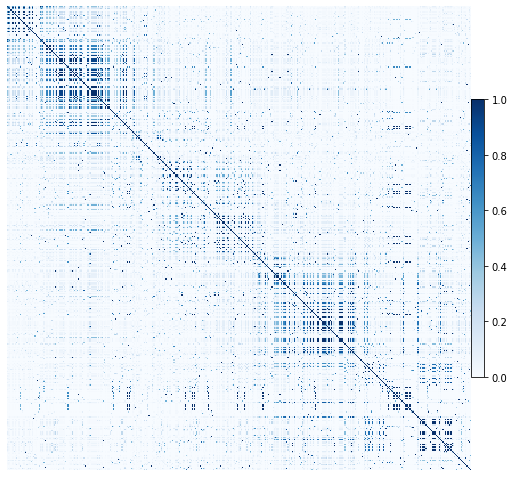

In [41]:
ts = msprime.simulate(100, recombination_rate=10, mutation_rate=20, random_seed=1)
ld_matrix_example(ts)

## Forward-Time Simulation

Coalescent simulations are naturally much faster than forward moving simulations

This is because we don't need to keep track of _every_ individual in a population, but rather just the ancestors of the sampled individuals 

Unfortunately, the markovian properties of the coalescent present a duality in the face of _real_ evolutionary forces like selection and continuous space

To study real world effects of evolution or sontinuous space on a population, we need individual based, forwards-time simulators.

This means we need to simulate and keep track of every individual genome in a population along with the vast amount of mutations which accumulate throughout.

Computationally, this limits us to modest size populations and genome sizes ... Bummer!

## Efficient pedigree recording for fast population genetics simulation,
[Jerome Kelleher, Kevin R. Thornton, Jaime Ashander, Peter L. Ralph, 2018](https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1006581)

Hm, well, if we record how _every_ individual is related to _every_ other individual,then, we can add neutral mutations after the fact to achieve the _same_ result.

No computational heavylifting required to keep track of millions or billions of mutations throughout the simulation, that should speed things up!

### Tree-sequence recording algorithm

For _every_ individual born, we:

1. add each gamete to the Node Table,

2. add entries to the Edge Table recording which parent each gamete inherited each bit of genome from

3. add any new mutations to the Mutation Table and (if necessary) their locations to the Site Table.

## Hold up, 

you said this made forward-time simulation faster ... 

But we don't have unlimited memory, for god's sake!

Plus, we (usually) don't care about lineages other than those of the sampled population.

You're right, that why every so often during simulation, we stop and _simplify,_ 

<img src="materials/simplify.png" width="450" align="center">

[Jerome Kelleher, Kevin R. Thornton, Jaime Ashander, Peter L. Ralph, 2018](https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1006581)

Before simplification:

![SegmentLocal](./materials/sim_wf_unlabeled.anim.gif "segment")

Before simplification:

![SegmentLocal](./materials/sim_wf_simplified.anim.gif "segment")

and look, it works!
<img src="materials/slim_speedup.png" width="550" align="center">
[Haller, Galloway, Kelleher, Messer, Ralph 2019](https://onlinelibrary.wiley.com/doi/pdf/10.1111/1755-0998.12968)

## Tree‐sequence recording in SLiM opens new horizons for forward‐time simulation of whole genomes
[Ben Haller, Jared Galloway, Jerome Kelleher, Philip Messer, Peter Ralph 2019](https://onlinelibrary.wiley.com/doi/pdf/10.1111/1755-0998.12968)

`SLiM` (Selection on Linked Mutations) is an _very_ powerful forward-time population genetics simulator with fitness effects, continuous space, WF and Non-WF models. 

Tree Sequence recording is _very_ simple to use. 

The package `pyslim` is used to deal with all treesequences going to and from `SLiM`

SLiM takes input in the form of `Eidos` Scripts, a custom scripting language to set up complex simulations.

In [45]:
! cat materials/example1.slim

initialize() {
        initializeTreeSeq();
        initializeMutationRate(0);
        initializeMutationType("m1", 0.5, "f", 0.0);
        initializeGenomicElementType("g1", m1, 1.0);
        initializeGenomicElement(g1, 0, 1e2-1);
        initializeRecombinationRate(c(2e-7,1e-2,2e-7), c(45,55,100)); 
}
1 {
	sim.addSubpop("p1", 500);
}
5000 late() {
	sim.treeSeqOutput("ex1_TS.trees");
}


Running Simulation


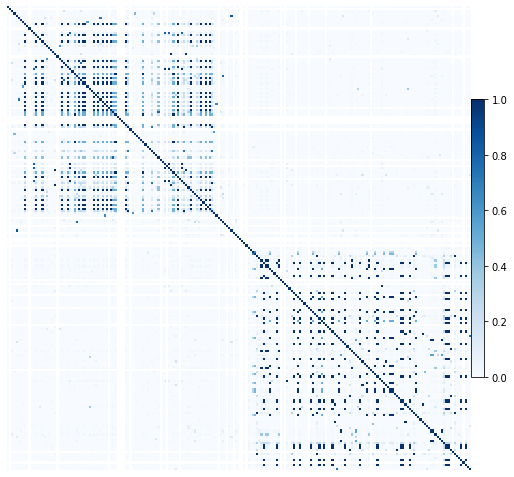

In [51]:
import pyslim
print(f"Running Simulation")

! slim -s 24 materials/example1.slim > sim_output.txt

ts = pyslim.load("ex1_TS.trees")
mutated = msprime.mutate(ts, rate=1e-4, random_seed=23, keep=True)
ld_matrix_example(mutated)

SLiMulations can be _very_ complex!

In [52]:
 ! cat materials/stickleback_simulation.slim

initialize(){

    //Source File With Helper Functions
	source("./dev_Utils.slim");

	//The Path Where You want sampling files written to
	pathToOutputFile = "./Output1/MyRecipe9_1_0/";

	//KNOBS//

	endOfSimulation = 150000; 		

	introduce = 100000;		

	samplingInterval = 50;

	numberOfLakes = 25;	
	
	optimumPhenoMarine = 10;
	
	optimumPhenoFresh = -10;

	individualsInOcean = 5000;
	
	individualsInFresh = 5000;

	numberOfEffectRegions = 10;

	sizeOfEffectRegions = 100000;

	sizeOfNonEffectBuffer = 4950000;

	mutationRateInEffectRegions = 1e-10;
	
	mutationRateInNeutralRegions = 0; //Because TreeSeq :-) 
	
	recombinationRateInEffectRegions = 1e-8;

	recombinationRateInNeutralRegions = 1e-8;

	migrationRate = 5e-5;

	//For the Header of Files

	individualsPerFresh = individualsInFresh/numberOfLakes;	
	lengthOfPops = asFloat(numberOfLakes);
	numberOfSamplingPoints = endOfSimulation/samplingInterval;	

	//Define constants 	

	defineConstant("END",endOfSimulation);
	defineConstant("INT",sa

With forward-time simulations, it is common to have a "burn-in" of $10N$ generations.

commonly, this is the number of generations that a well mixed population takes to coalesce. 

But what if $N$ is _really really_ big?

### _Re-capitation!_

a `TreeSequence` output by `SLiM` saves the _entire_ state of the simulation at the time it's dumped.

By saving the _initial_ generation of the simulation, we can run a coalescent on top to finish off the prior history

<img src="materials/pedigree_recapitate.png" width="300" align="center">

and look how easy it is!

```python
orig_ts = pyslim.load("example_sim.trees")
rts = orig_ts.recapitate(recombination_rate = 1e-8, Ne=200)
```

<img src="materials/tstools.png" width="1000" align="center">

## More people to thank

* Peter Ralph
* Andrew Kern
* Leslie Coonrod
* Bill Cresko
* Stacey Wagner
* Ben Haller
* Jerome Kelleher
